In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MedicalImagesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        print(f" Initialisation du dataset avec le dossier : {root_dir}")
        self.root_dir = root_dir
        self.transform = transform
        
        # Liste toutes les images .jpg dans le dossier
        self.image_paths = [
            os.path.join(root_dir, fname) 
            for fname in os.listdir(root_dir) 
            if fname.lower().endswith('.jpg')
        ]
        
        print(f"{len(self.image_paths)} images trouvées dans {root_dir}")
        if len(self.image_paths) == 0:
            print(" Aucun fichier trouvé, vérifie ton chemin !")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        print(f" Chargement de l'image : {img_path}")
        
        img = Image.open(img_path).convert('L')  # Convertir en niveaux de gris
        
        if self.transform:
            img = self.transform(img)
        
        return img


In [2]:
# Spécifie ton chemin exact :
data_dir = "/kaggle/input/images-medical-jpg/image_medical"

# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),        # Adapter la taille à 64x64 pour DCGAN
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])   # Normaliser entre -1 et 1
])

# Créer le dataset
dataset = MedicalImagesDataset(root_dir=data_dir, transform=transform)

# Tester en chargeant une image
img = dataset[0]
print(f"Format image chargée : {img.shape}")  # torch.Size([1, 64, 64])

# Créer un DataLoader pour les batches
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Tester une batch
for batch in dataloader:
    print(f"Batch chargé avec forme : {batch.shape}")  # torch.Size([32, 1, 64, 64])
    break


 Initialisation du dataset avec le dossier : /kaggle/input/images-medical-jpg/image_medical
787 images trouvées dans /kaggle/input/images-medical-jpg/image_medical
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_031 (3).jpg
Format image chargée : torch.Size([1, 64, 64])
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_055 (6).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_064.jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_118.jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_041 (3).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_102 (4).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_074 (2).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_062.jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_066

 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_031 (3).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_087 (4).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_127.jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_086 (7).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_079 (5).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_057 (6).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_110 (6).jpg
 Chargement de l'image : /kaggle/input/images-medical-jpg/image_medical/slice_110 (7).jpg


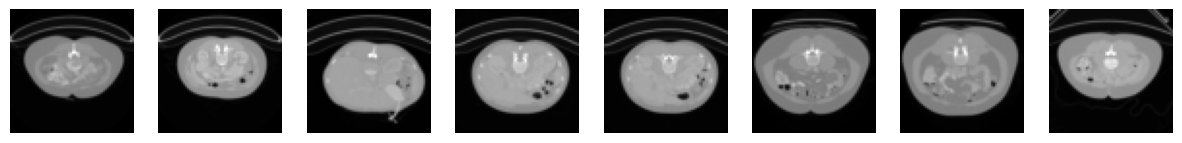

In [3]:
import matplotlib.pyplot as plt
import torch

# Fonction pour afficher plusieurs images
def show_images(dataset, num_images=8):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        img = dataset[i]
        
       
        if isinstance(img, torch.Tensor):
            img = img.squeeze(0)  # Retirer la dimension channel (grayscale)
            img = img.numpy()
        
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
    
    plt.show()

# Utilisation :
show_images(dataset, num_images=8)
